## Unsupervised ML Python Homework

In [1]:
import numpy as np
import pandas as pd
import sklearn
import sys
import warnings
import os
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    os.environ["PYTHONWARNINGS"] = "ignore" 

import matplotlib.pyplot as plt
import seaborn as sns
import time


from sklearn.decomposition import PCA

import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

In [2]:
data = pd.read_csv('unsupervised_ml_homework_data.csv')

### Soal 1: PCA

Instruksi:
1. Lakukan PCA pada data yang telah di-import di cell atas.
2. Ketentuan PCA: Ambil sampai threshold explained variancenya 0.8 (80%)
3. Berapa Principal Components yang diambil?
4. Simpan data hasil PCA karena data hasil PCA ini akan digunakan di Soal 2: K-Means

In [3]:
### lakukan PCA di sini

In [4]:
data.shape

(1000, 20)

In [5]:
#Melakukan PCA dengan explained variancenya 0.8 (80%)
start_time = time.time()
pca_80 = PCA(0.80)
pca_80.fit(data)
x_train_pca_80 = pca_80.transform(data)
finish_time = time.time()

In [6]:
#Meliat Principal Components yang diambil
pca_80.n_components_

12

In [7]:
print('PCA Fit and Transform finished in', finish_time - start_time, 'seconds.')
print('Hanya tersisa:', pca_80.n_components_, 'feature columns setelah dlakukan PCA.')
print('PCA kali ini berhasil mereduksi dataset sebanyak', (1-(pca_80.n_components_/20))*100, 'persen')

PCA Fit and Transform finished in 0.10653924942016602 seconds.
Hanya tersisa: 12 feature columns setelah dlakukan PCA.
PCA kali ini berhasil mereduksi dataset sebanyak 40.0 persen


Agar mampu menjelaskan 80% variance dalam data, diperlukan 12 kolom dari data awal yang berjumlah 20 kolom

##### Jawab: Hasil PCA adalah mengambil 12 Principal Components.

In [8]:
#menyimpan data hasil PCA
hasil_pca=pd.DataFrame(x_train_pca_80)

### Soal 2: K Means

Instruksi:
1. Dari data yang sudah di-PCA-kan (jadi datanya sudah baru ya, bukan data original lagi, ingat, data yang sudah di-PCA-kan), kita akan menentukan k = ?? yang paling ideal untuk clustering.
2. Lakukan Elbow dan Silhouette method
3. Visualisasikan hasil Elbow dan Silhouette method
4. Berapa nilai k yang terbaik? 

In [9]:
### Data hasil pca
hasil_pca

,0,1,2,3,4,5,6,7,8,9,10,11
0,4.489239,23.388822,-1.245327,-0.604663,7.168715,12.140433,-2.606712,-2.982270,-1.240097,0.661235,3.653253,1.176113
1,-16.927579,-21.720006,0.453236,-2.092276,-1.854185,8.105598,0.857659,2.890713,0.310611,-0.045326,-4.492495,4.243733
2,29.585439,-0.367065,8.009331,3.564103,3.851260,1.446380,8.451138,-9.789632,-3.855225,-1.684923,-3.405300,-8.356691
3,-18.107060,-8.676266,-0.009083,9.928400,2.647460,-2.341457,4.218565,1.104390,-2.239445,-1.504301,3.573772,-18.724099
4,-19.133698,-13.345589,-5.568956,-6.848398,-5.305273,-10.130572,-9.445192,0.368672,-7.123532,-2.462980,2.651811,-6.460466
...,...,...,...,...,...,...,...,...,...,...,...,...
995,-27.596745,-5.675153,1.037456,2.060439,12.357932,-1.168417,-5.429511,-7.116851,2.629224,-3.142956,2.621997,-0.400097
996,-25.101230,-16.880265,-2.327276,0.339001,-0.856307,7.415144,3.238225,4.557121,-0.463356,-7.809110,3.039680,6.374570
997,23.515248,2.271175,5.068040,1.014359,12.138911,0.638384,-5.087893,-0.279657,1.870682,1.883865,-1.320213,-5.322234
998,32.730315,-4.069322,10.025550,0.286854,-16.406983,-5.374449,9.337272,5.613491,-0.188005,-8.060883,3.080424,2.834658


In [10]:
### Elbow Method

In [11]:
# memilih features
x = hasil_pca

In [12]:
score = []

for cluster in range(1,11):
    kmeans = KMeans(n_clusters = cluster)
    scaled_data = StandardScaler().fit_transform(x)
    kmeans.fit(scaled_data)
    score.append(kmeans.inertia_)

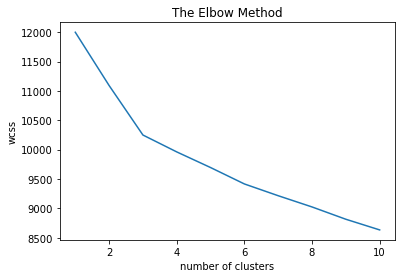

In [13]:
# plotting the score

plt.plot(range(1,11), score)
plt.title('The Elbow Method')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

Menggunakan Elbow Mwthod, pada grafik terlihat 'Elbow' terjadi di k = 3

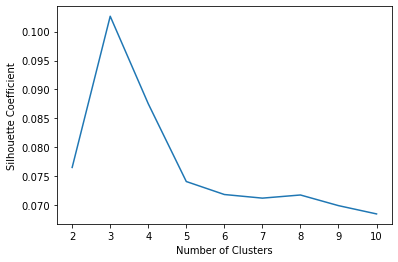

In [14]:
### Silhouette Score
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    scaled_data = StandardScaler().fit_transform(x)
    kmeans.fit(scaled_data)
    score = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_coefficients.append(score)
    
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

Menggunakan Silhouette Score, Nilai Silhouette tertinggi ada di k = 3

Berdasarkan hasil kedua metode tersebut, dapat diasumsikan bahwa k = 3 menjadi 'k' yang ideal dalam k-Means.

##### Jawab: Nilai k yang terbaik berdasarkan Elbow dan Silhouette method adalah...k = 3